In [1]:
#Import The Libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
# Data set with Size of House and Price

data = {
    'Size' : [1,2,3,4,5,6,7,8,9,10],
    'Price' : [3,6,11,18,27,38,51,66,83,102]
}

df = pd.DataFrame(data)

In [3]:
# Size - feature and Price - Target

X = df[['Size']]
y = df['Price']

In [4]:
# Spliting data intp 80% for Training and 20% for Testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

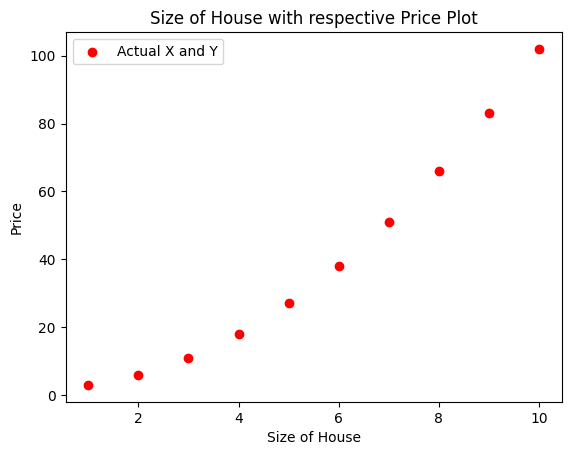

In [5]:
# Plotting Actual Values

plt.scatter(X, y, color='red', label='Actual X and Y')
plt.title('Size of House with respective Price Plot')
plt.xlabel('Size of House')
plt.ylabel('Price')
plt.legend()
plt.show()


In [6]:
# Making a Model with Best fit Degree

degrees = [2,4,6,8]
errors = {}

for val in degrees:
    model = Pipeline([
        ('ploynomialModel', PolynomialFeatures(degree=val)),
        ('LinearModel', LinearRegression())
    ])
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    
    errors[f'degree - {val}'] = {'Mean Square Error' : mse, 'Model' : model}

In [7]:
# Evaluating the Error

errors

{'degree - 2': {'Mean Square Error': 1.8972104770565334e-28,
  'Model': Pipeline(steps=[('ploynomialModel', PolynomialFeatures()),
                  ('LinearModel', LinearRegression())])},
 'degree - 4': {'Mean Square Error': 4.0405455565420225e-27,
  'Model': Pipeline(steps=[('ploynomialModel', PolynomialFeatures(degree=4)),
                  ('LinearModel', LinearRegression())])},
 'degree - 6': {'Mean Square Error': 1.5277648270361874e-24,
  'Model': Pipeline(steps=[('ploynomialModel', PolynomialFeatures(degree=6)),
                  ('LinearModel', LinearRegression())])},
 'degree - 8': {'Mean Square Error': 3.092082978631943e-05,
  'Model': Pipeline(steps=[('ploynomialModel', PolynomialFeatures(degree=8)),
                  ('LinearModel', LinearRegression())])}}

In [8]:
# Selecting Best line Degree which is 6

val = errors['degree - 6']
model = val['Model']

In [9]:
# Comparing the Actual Values and Predicting Values

y_pred = model.predict(X_test)
compareValue = pd.DataFrame({'Actual Value' : y_test, 'Predicted value' : y_pred})
compareValue

,Actual Value,Predicted value
8,83,83.0
1,6,6.0


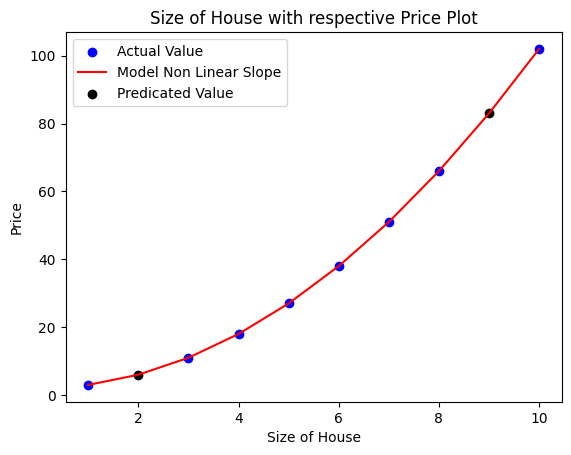

In [10]:
# Ploting the Model Learning Graph

plt.scatter(X_train,y_train, color='blue', label='Actual Value')
plt.plot(X, model.predict(X), color='red', label='Model Non Linear Slope')
plt.scatter(X_test, y_pred, color='black', label='Predicated Value')
plt.title('Size of House with respective Price Plot')
plt.xlabel('Size of House')
plt.ylabel('Price')
plt.legend()
plt.show()